In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"D:\NCKH-thue\114_BuBu_Phu_UEL\data\data.csv")

In [ ]:
list(data)

In [3]:
data['dtime_proposal'] = pd.to_datetime(data['dtime_proposal'], format='%m/%d/%Y %H:%M')
data['dtime_signature_contract'] = pd.to_datetime(data['dtime_signature_contract'], format='%m/%d/%Y %H:%M')

In [4]:
data = pd.get_dummies(data, columns=['gender', 'education', 'job', 'family_status', 'product'])

In [5]:
data['family_status_Other'] = ((data['family_status_Living with partner'] == 1) |
                             (data['family_status_Separated'] == 1) |
                             (data['family_status_Widowed'] == 1)).astype(int)

In [6]:
data['isNewCustomer'] = data['cnt_contract'].apply(lambda x: 0 if x == 1 else 1)

In [7]:
data['income'] = data['income']/1000000
data['amt_credit'] = data['amt_credit']/1000000

In [8]:
df = data.drop(['gender_Female', 'education_Elementary (primary) school', 'job_Farmer', 'product_ACL', 'product_CLX', 'family_status_Living with partner', 'family_status_Separated', 'family_status_Widowed',
                'cnt_instalment', 'cnt_instalment_paid', 'cnt_instalment_delinq', 'evaluation_hours', 'cnt_contract'], axis=1)

In [9]:
df = df[['isFullPayment', 'gender_Male', 'age', 'income', 'education_Junior school education', 'education_High school education',
        "education_Bachelor's degree", "education_Master's degree", 'job_Worker', 'job_Salesman', 'job_Services',
        'job_Administrative', 'job_Engineer', 'job_Other', 'family_status_Married', 'family_status_Divorced', 'family_status_Other',
        'product_CD', 'product_TW', 'amt_credit', 'interest_rate', 'isNewCustomer']]

In [10]:
list(df)

['isFullPayment',
 'gender_Male',
 'age',
 'income',
 'education_Junior school education',
 'education_High school education',
 "education_Bachelor's degree",
 "education_Master's degree",
 'job_Worker',
 'job_Salesman',
 'job_Services',
 'job_Administrative',
 'job_Engineer',
 'job_Other',
 'family_status_Married',
 'family_status_Divorced',
 'family_status_Other',
 'product_CD',
 'product_TW',
 'amt_credit',
 'interest_rate',
 'isNewCustomer']

In [11]:
df.isnull().sum()

isFullPayment                        0
gender_Male                          0
age                                  0
income                               0
education_Junior school education    0
education_High school education      0
education_Bachelor's degree          0
education_Master's degree            0
job_Worker                           0
job_Salesman                         0
job_Services                         0
job_Administrative                   0
job_Engineer                         0
job_Other                            0
family_status_Married                0
family_status_Divorced               0
family_status_Other                  0
product_CD                           0
product_TW                           0
amt_credit                           0
interest_rate                        0
isNewCustomer                        0
dtype: int64

In [12]:
df = df.dropna()
df.isnull().sum()

isFullPayment                        0
gender_Male                          0
age                                  0
income                               0
education_Junior school education    0
education_High school education      0
education_Bachelor's degree          0
education_Master's degree            0
job_Worker                           0
job_Salesman                         0
job_Services                         0
job_Administrative                   0
job_Engineer                         0
job_Other                            0
family_status_Married                0
family_status_Divorced               0
family_status_Other                  0
product_CD                           0
product_TW                           0
amt_credit                           0
interest_rate                        0
isNewCustomer                        0
dtype: int64

In [13]:
df_summary_statistics = df.describe().T
df_summary_statistics

,count,mean,std,min,25%,50%,75%,max
isFullPayment,63999.0,0.935640,0.245396,0.0,1.000,1.000,1.00,1.000000
gender_Male,63999.0,0.554087,0.497070,0.0,0.000,1.000,1.00,1.000000
age,63999.0,35.342958,9.019368,19.0,28.000,34.000,41.00,61.000000
income,63999.0,11.336950,6.609858,1.1,8.000,10.000,13.00,99.000000
education_Junior school education,63999.0,0.272895,0.445451,0.0,0.000,0.000,1.00,1.000000
education_High school education,63999.0,0.425335,0.494398,0.0,0.000,0.000,1.00,1.000000
education_Bachelor's degree,63999.0,0.160206,0.366800,0.0,0.000,0.000,0.00,1.000000
education_Master's degree,63999.0,0.018922,0.136251,0.0,0.000,0.000,0.00,1.000000
job_Worker,63999.0,0.313489,0.463915,0.0,0.000,0.000,1.00,1.000000
job_Salesman,63999.0,0.093251,0.290787,0.0,0.000,0.000,0.00,1.000000


In [14]:
df_summary_statistics.to_excel("D:/NCKH-thue/114_BuBu_Phu_UEL/desciptive_statistics.xlsx") 

In [15]:
df.corr()

,isFullPayment,gender_Male,age,income,education_Junior school education,education_High school education,education_Bachelor's degree,education_Master's degree,job_Worker,job_Salesman,...,job_Engineer,job_Other,family_status_Married,family_status_Divorced,family_status_Other,product_CD,product_TW,amt_credit,interest_rate,isNewCustomer
isFullPayment,1.000000,-0.008803,0.009832,-0.051202,0.008870,0.014934,-0.011303,0.009319,0.012252,-0.005671,...,-0.000174,-0.004291,0.040784,-0.025997,-0.003737,0.313061,-0.088392,-0.276621,-0.206859,0.005470
gender_Male,-0.008803,1.000000,-0.025253,0.046195,0.003096,0.034538,-0.016716,-0.017765,0.020759,-0.136621,...,0.125616,0.047289,-0.080279,-0.051171,-0.061390,0.012416,-0.007540,-0.032219,0.006865,0.038633
age,0.009832,-0.025253,1.000000,0.071739,0.091272,-0.110344,-0.122963,-0.028804,-0.152982,0.062820,...,-0.037839,0.052597,0.385907,0.041627,0.075347,0.017910,0.003625,0.022570,-0.059376,-0.015662
income,-0.051202,0.046195,0.071739,1.000000,-0.057392,0.018428,0.088641,0.028403,-0.113097,0.059416,...,0.046550,0.049587,0.035872,0.015957,-0.013853,-0.140947,0.004601,0.255671,0.064954,0.147505
education_Junior school education,0.008870,0.003096,0.091272,-0.057392,1.000000,-0.527056,-0.267579,-0.085081,0.064642,0.010780,...,-0.059615,-0.035464,0.066901,0.011140,0.010735,0.036395,0.020101,-0.045292,-0.024248,-0.023239
education_High school education,0.014934,0.034538,-0.110344,0.018428,-0.527056,1.000000,-0.375760,-0.119479,0.042750,0.013325,...,-0.007839,0.008015,-0.026330,-0.016856,-0.022195,0.003563,-0.028175,-0.008573,-0.006609,0.052699
education_Bachelor's degree,-0.011303,-0.016716,-0.122963,0.088641,-0.267579,-0.375760,1.000000,-0.060658,-0.125178,-0.049385,...,0.116394,0.051361,-0.104063,-0.011282,-0.016852,-0.046305,-0.029073,0.070893,0.028648,0.013399
education_Master's degree,0.009319,-0.017765,-0.028804,0.028403,-0.085081,-0.119479,-0.060658,1.000000,-0.029080,-0.019691,...,0.028621,0.009648,-0.015752,-0.004899,-0.009699,0.020088,-0.015200,0.001895,-0.008237,-0.005776
job_Worker,0.012252,0.020759,-0.152982,-0.113097,0.064642,0.042750,-0.125178,-0.029080,1.000000,-0.216707,...,-0.123206,-0.475815,-0.047111,-0.004331,-0.012772,0.025324,0.013472,-0.053946,-0.009256,-0.022240
job_Salesman,-0.005671,-0.136621,0.062820,0.059416,0.010780,0.013325,-0.049385,-0.019691,-0.216707,1.000000,...,-0.058469,-0.225806,0.029914,0.014180,0.018113,0.001389,-0.001458,0.035127,-0.010204,0.004696


<AxesSubplot:>

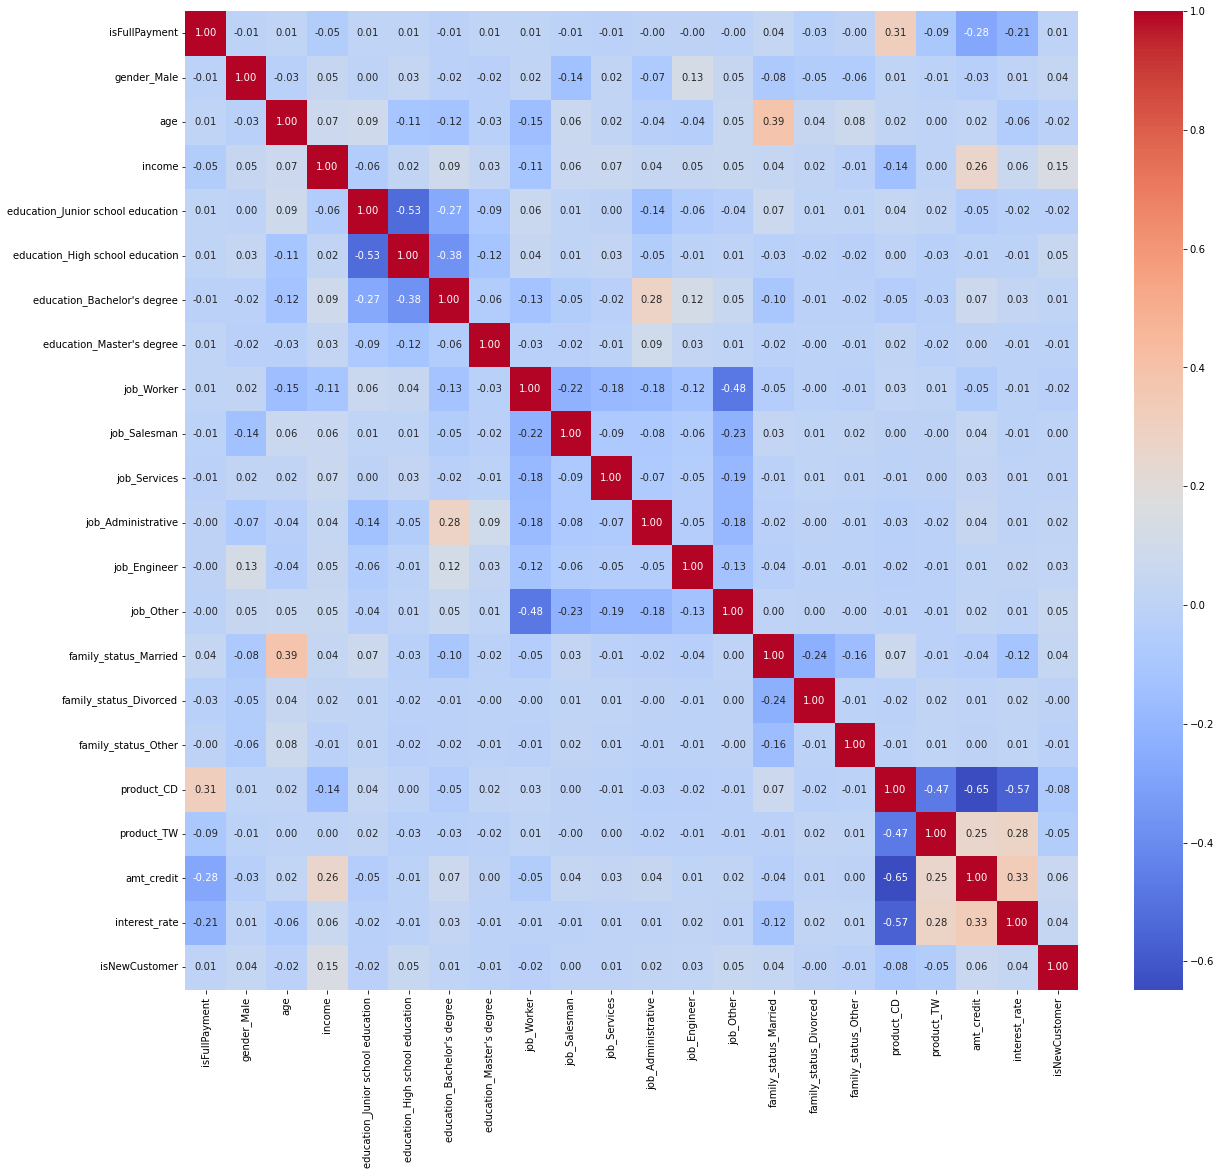

In [16]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [17]:
y_var = df['isFullPayment']
x_var = df.drop('isFullPayment', axis=1)

In [18]:
x_var = sm.add_constant(x_var)

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:
model = sm.Logit(y_var, x_var)
res = model.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.202748
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          isFullPayment   No. Observations:                63999
Model:                          Logit   Df Residuals:                    63977
Method:                           MLE   Df Model:                           21
Date:                Sat, 18 Mar 2023   Pseudo R-squ.:                  0.1510
Time:                        02:19:05   Log-Likelihood:                -12976.
converged:                       True   LL-Null:                       -15283.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.9153      0.132      6

In [ ]:
summary_table = res.summary2().tables[1]

In [ ]:
summary_table.to_excel('D:/NCKH-thue/114_BuBu_Phu_UEL/summary_table.xlsx', index=False)

In [ ]:
params = res.params
conf_int = res.conf_int()
odds_ratios = np.exp(params)
odds_ratios.name = 'OR'
conf_int = np.exp(conf_int)
conf_int.columns = ['OR_2.5%', 'OR_97.5%']
conf_int['OR'] = odds_ratios
summary_table2 = summary_table.join(conf_int)
print(summary_table2)

In [ ]:
summary_table2.to_excel('D:/NCKH-thue/114_BuBu_Phu_UEL/summary_table2.xlsx', index=False)